In [178]:
import numpy as np
import numpy.testing as npt
import matplotlib.pyplot as plt
import cv2
import torch
from torchvision.models import resnet50, ResNet50_Weights
import math

In a (4, 7) *numpy* array we store data about the calorie intake and expenditure of a person throughout the week, as follows:
- The rows specify the number of calories from protein sources, the number of calories from fat sources, the number of calories from carbohydrates sources and the calorie expenditure through physical activity, respectively.
- The columns specify the day of the week for which the data were recorded.

Compute the following (without using any explicit for loop):
- the total number of calories consumed each day;
- the percentage of calories from protein sources and the percentage of calories from carbohydrates (as an array with 2 rows and 7 columns), rounded to two decimal places [numpy.around](https://numpy.org/doc/stable/reference/generated/numpy.around.html) );
- the day in which the maximum number of calories were burned through physical activity;
- the sum of calorie expenditure and calories from protein sources for each working day (the result with be an array with 5 elements);
- the number of calories from protein sources, number of calories from fat sources, number of calories from carbohydrate sources and the calorie expenditure for the week as a (1, 4) array.


**Expected output:**

The total number of calories consumed each day:
[730 555 720 874 599 637 690]

The percentage of calories from protein sources and the percentage of calories from carbohydrates:
[[12.33 18.02 23.61 22.88 16.36 26.22 21.74]
 [46.58 45.95 55.56 57.21 50.25 31.4  43.48]]

The day in which the maximum number of calories were burned through physical activity is :
Monday

The sum of calorie expenditure and calories from protein sources for each working day (the result with be an array with 5 elements):
[[340 190 340 400 185]]

The number of calories from protein sources, number of calories from fat sources, number of calories from carbohydrate sources and the calorie expenditure for the week:
[[ 975]
 [1534]
 [2296]
 [1157]]

 You can use [assert_equal](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_equal.html) to check for your result.

In [179]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
statistics = np.array([
                      [90, 100, 170, 200, 98, 167, 150], # calories from protein
                      [300, 200, 150, 174, 200, 270, 240], # calories from fat
                      [340, 255, 400, 500, 301, 200, 300],  # calories from carbs
                      [250, 90, 170, 200, 87, 160, 200]]) # calorie expenditure

number_of_calories_consumed_each_day = np.sum(statistics[:3, :], axis=0) # Axa = 0 => suma pe coloane
print(f"number_of_calories_consumed_each_day:\n{number_of_calories_consumed_each_day}\n")
npt.assert_equal(number_of_calories_consumed_each_day, np.array([730, 555, 720, 874, 599, 637, 690]))

percentage_of_protein_and_carbohydrates = np.around(statistics[[0,2], :] / np.sum(statistics[:3, :], axis=0) * 100, 2)
print(f"percentage_of_protein_and_carbohydrates:\n{percentage_of_protein_and_carbohydrates}\n")
npt.assert_equal(percentage_of_protein_and_carbohydrates, np.array(
 [[12.33, 18.02, 23.61, 22.88, 16.36, 26.22, 21.74]
, [46.58, 45.95, 55.56, 57.21, 50.25, 31.4 , 43.48]]))

maximum_calorie_expenditure = np.argmax(statistics[3, :])
print(f"maximum_calorie_expenditure:\n{days[maximum_calorie_expenditure]}\n")
npt.assert_equal("Monday", days[maximum_calorie_expenditure])

sum_of_expediture_and_protein_on_working_days = np.sum(statistics[[0,3], :5], axis=0)
print(f"sum_of_expediture_and_protein_on_working_days:\n{sum_of_expediture_and_protein_on_working_days}\n")
npt.assert_equal(sum_of_expediture_and_protein_on_working_days, np.array([340, 190, 340, 400, 185]))

sum_by_each_type = np.sum(statistics, axis=1).reshape(4, 1)
print(f"sum_by_each_type:\n{sum_by_each_type}\n")
npt.assert_equal(sum_by_each_type, np.array([[975],[1534],[2296],[1157]]))

number_of_calories_consumed_each_day:
[730 555 720 874 599 637 690]

percentage_of_protein_and_carbohydrates:
[[12.33 18.02 23.61 22.88 16.36 26.22 21.74]
 [46.58 45.95 55.56 57.21 50.25 31.4  43.48]]

maximum_calorie_expenditure:
Monday

sum_of_expediture_and_protein_on_working_days:
[340 190 340 400 185]

sum_by_each_type:
[[ 975]
 [1534]
 [2296]
 [1157]]



You might be familiar from the Artificial Intelligence class with some of the activation functions used in neural networks: ReLU, tahh, sigmoid and their friends. In the image below you have the common activation functions depicted as dance moves.
Pick your favourite three "dance moves" and plot them with matplotlib using subplots.

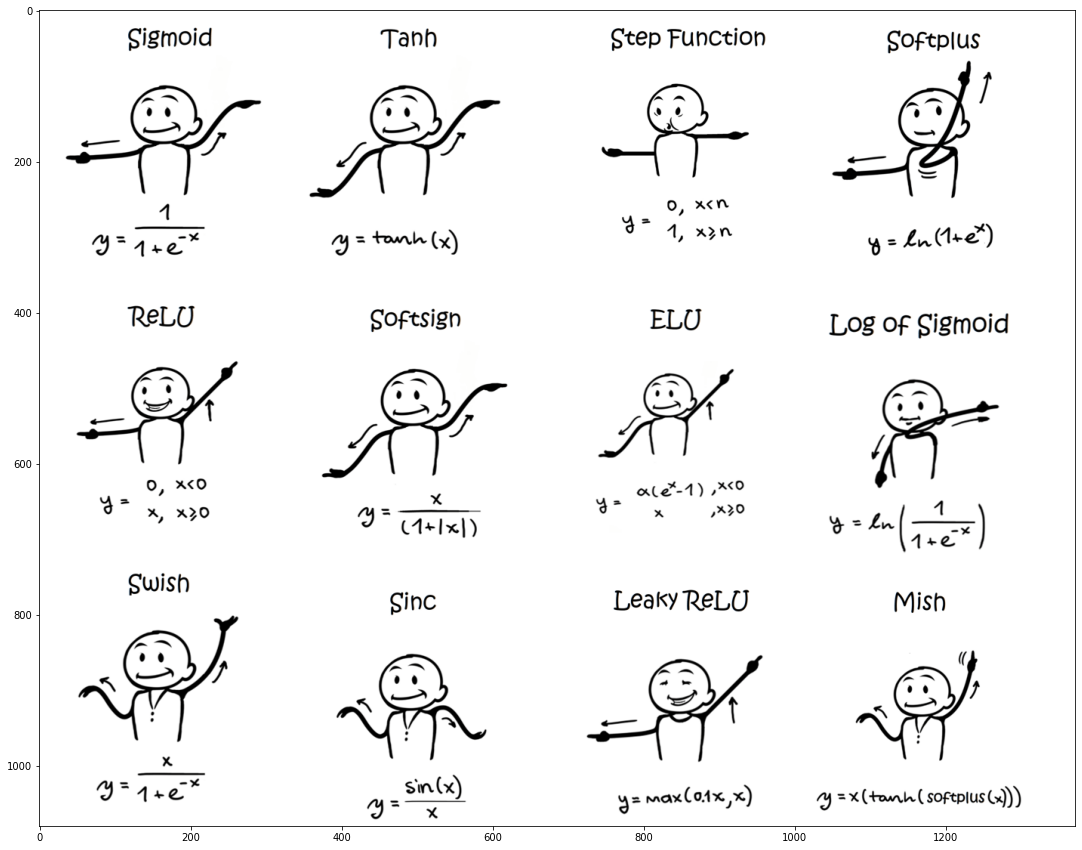

In [180]:
dance_moves_img = cv2.imread('dance_moves.png')
dpi = plt.rcParams['figure.dpi']
height, width, depth = dance_moves_img.shape
figsize = width / float(dpi), height / float(dpi)
plt.figure(figsize=figsize)
plt.imshow(dance_moves_img)

<ipython-input-181-5288f8d13860>:3: RuntimeWarning: invalid value encountered in divide
  sinc_function = lambda x: np.sin(x) / x


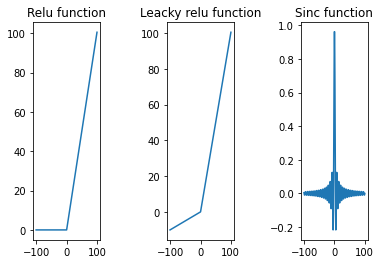

In [181]:
x_points = np.arange(-101, 101, 0.5) 
relu_function = lambda x: np.maximum(0, x)
sinc_function = lambda x: np.sin(x) / x
leacky_relu_function = lambda x: np.maximum(0.1 * x, x)

plt.subplot(1, 3, 1)
plt.plot(x_points, relu_function(x_points))
plt.title('Relu function')

plt.subplot(1, 3, 2)
plt.plot(x_points, leacky_relu_function(x_points))
plt.title('Leacky relu function')

plt.subplot(1, 3, 3)
plt.plot(x_points, sinc_function(x_points))
plt.title('Sinc function')

plt.subplots_adjust(wspace=1)
plt.show()

Plot the histograms of the red, blue and green channel of an image on the same plot. The histogram of the red channel should be displayed in red bars, the histogram of the blue channel should be displayed in blue bars and the histogram of the green channel should be displayed with green bars.

In [182]:
img = cv2.imread('cute_cat.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resize_prop = cv2.resize(img, (0, 0), fx=0.25, fy=0.25)
img_gray = 0.2126*img_resize_prop[:,:,0] + 0.7152*img_resize_prop[:,:,1] + 0.0722*img_resize_prop[:,:,2]
img_gray = img_gray.astype(np.uint8)

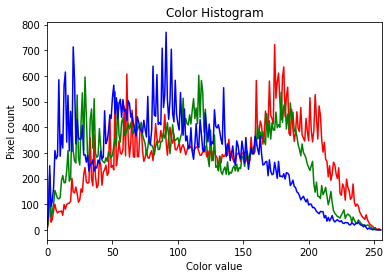

In [183]:
def compute_histogram_color(img, row, column, index):
    plt.subplot(row, column, index)
    colors = ("red", "green", "blue")
    plt.xlim([0, 256])
    for color_number, color_name in enumerate(colors):
        histogram, bin_edges = np.histogram(
            img[:, :, color_number], bins=256, range=(0, 256)
        )
        plt.plot(bin_edges[0:-1], histogram, color=color_name)
    plt.title("Color Histogram")
    plt.xlabel("Color value")
    plt.ylabel("Pixel count")
compute_histogram_color(img_resize_prop, 1, 1, 1)

def display_img_color(img, row, column, index):
    plt.subplot(row, column, index)
    plt.imshow(img)

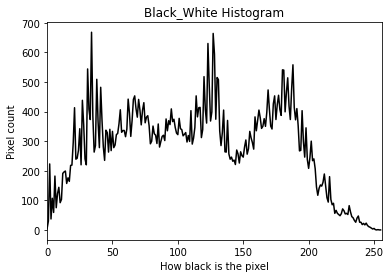

In [184]:
def compute_histogram_black_and_white(img_gray, row, column, index):
    plt.subplot(row, column, index)
    plt.xlim([0, 256])
    histogram, bin_edges = np.histogram(img_gray, bins=256, range=(0, 256))
    plt.plot(bin_edges[0:-1], histogram, color="black")
    plt.title("Black_White Histogram")
    plt.xlabel("How black is the pixel")
    plt.ylabel("Pixel count")
compute_histogram_black_and_white(img_gray, 1, 1, 1)

Add to each element in the grayscale image with a positive number and store the result in img_l1.
What do you think is the effect of this operation? Display the image img_l1. Make sure that the result is in the range [0, 255].

In [185]:
img_l1 = np.copy(img_gray)
print(f"Initial img_l1:\n{img_l1}\n")
img_l1 += 256
print(f"If we add 256 the image will be:\n{img_l1}\n")
img_l1 += 128
print(f"If we add 128 the image will be:\n{img_l1}\n")
npt.assert_equal(True, np.max(img_l1) <= 255)

Initial img_l1:
[[153 153 155 ...  14  14  14]
 [153 153 155 ...  14  14  14]
 [152 156 156 ...  14  14  14]
 ...
 [ 52  56  56 ... 145 133 132]
 [ 53  57  57 ... 132 137 127]
 [ 56  60  61 ... 137 143 141]]

If we add 256 the image will be:
[[153 153 155 ...  14  14  14]
 [153 153 155 ...  14  14  14]
 [152 156 156 ...  14  14  14]
 ...
 [ 52  56  56 ... 145 133 132]
 [ 53  57  57 ... 132 137 127]
 [ 56  60  61 ... 137 143 141]]

If we add 128 the image will be:
[[ 25  25  27 ... 142 142 142]
 [ 25  25  27 ... 142 142 142]
 [ 24  28  28 ... 142 142 142]
 ...
 [180 184 184 ...  17   5   4]
 [181 185 185 ...   4   9 255]
 [184 188 189 ...   9  15  13]]



Compute and display the histogram of img_l1.  What do you notice? How is this histogram different than the previous one?

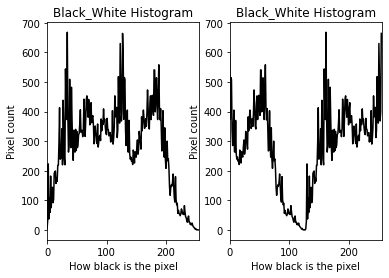

In [186]:
compute_histogram_black_and_white(img_gray,1, 2, 1)
compute_histogram_black_and_white(img_l1,1, 2, 2)

Now add to the grayscale image a negative number and store the result in img_l2.
If the resulting value is less than 0, clamp it to this 0.

What do you think is the effect of this operation?

In [187]:
img_l2 = np.copy(img_gray)
print(f"Initial img_l1:\n{img_l2}\n")
img_l2 -= 256
print(f"If we substract 256 the image will be:\n{img_l2}\n")
img_l2 -= 128
print(f"If we substract 128 the image will be:\n{img_l2}\n")
npt.assert_equal(True, np.max(img_l2) >= 0)

Initial img_l1:
[[153 153 155 ...  14  14  14]
 [153 153 155 ...  14  14  14]
 [152 156 156 ...  14  14  14]
 ...
 [ 52  56  56 ... 145 133 132]
 [ 53  57  57 ... 132 137 127]
 [ 56  60  61 ... 137 143 141]]

If we substract 256 the image will be:
[[153 153 155 ...  14  14  14]
 [153 153 155 ...  14  14  14]
 [152 156 156 ...  14  14  14]
 ...
 [ 52  56  56 ... 145 133 132]
 [ 53  57  57 ... 132 137 127]
 [ 56  60  61 ... 137 143 141]]

If we substract 128 the image will be:
[[ 25  25  27 ... 142 142 142]
 [ 25  25  27 ... 142 142 142]
 [ 24  28  28 ... 142 142 142]
 ...
 [180 184 184 ...  17   5   4]
 [181 185 185 ...   4   9 255]
 [184 188 189 ...   9  15  13]]



Compute and display the histogram of img_l2. What do you notice? How is this histogram different than the previous ones?

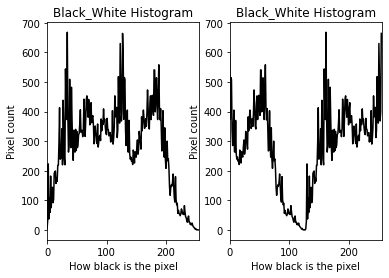

In [188]:
compute_histogram_black_and_white(img_gray,1, 2, 1)
compute_histogram_black_and_white(img_l2,1, 2, 2)

Add a positive number (for example 40) to the red channel of the color image and store the result in imgg. If the result of the addition exceeds 255, clamp it to 255.
What do you think is the effect of this operation?
Display the resulting image imgr.

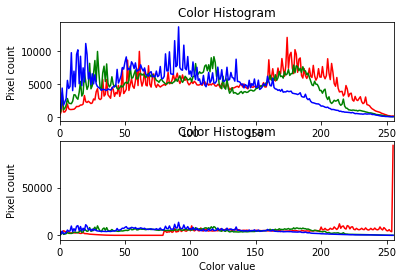

In [189]:
imgg = np.copy(img)
positive_number = 40
imgg += np.array([[[positive_number, 0, 0]]], dtype=np.uint8)
imgg[img[:, :, 0] < positive_number, 0] = 255
compute_histogram_color(img,2, 1, 1)
compute_histogram_color(imgg,2, 1, 2)

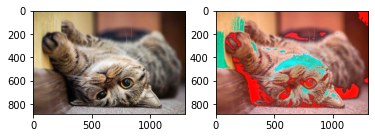

In [190]:
display_img_color(img, 1, 2, 1)
display_img_color(imgg, 1, 2, 2)

Display a region of interest from the input image defined by the rectangle (x=350, y=400, sz=(500x400)).

Hint: an image is just a numpy array, so you can easily achieve this with array slicing.

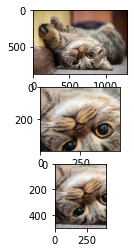

In [191]:
display_img_color(img, 3, 1, 1)
display_img_color(img[350:, 400:, :][:400, :500, :], 3, 1, 2)
display_img_color(img[350:, 400:, :][:500, :400, :], 3, 1, 3)


In the last part of this introductory laboratory, you'll "meet" a convolutional network for object classification. For now, consider it just as a black box that takes an image as input and outputs the 3-top predictions; however this network requires that the input data has the following properties: the size of the input image must be 224x224, the channels of the image should be stored in RGB format, the type of the data (of the numpy array) is float32 and the pixel values are normalized.
Your task is to pre-process the input images such that they are in the format requested by the network.

In [192]:
weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)
img_path = 'elephant.jpg'
img_for_model = cv2.imread(img_path)
img_for_model = cv2.cvtColor(img_for_model, cv2.COLOR_BGR2RGB)

resize the image by preserving the aspect ratio, such that its smallest dimension has 232 pixels;

In [193]:
ratio = 232 / min(img_for_model.shape[0], img_for_model.shape[1])
img_for_model_resized_ratio = cv2.resize(img_for_model, (0, 0), fx=ratio, fy=ratio)
print(f"Initial shape: {img_for_model.shape}")
print(f"Resized shape: {img_for_model_resized_ratio.shape}")
npt.assert_equal(True, img_for_model_resized_ratio.shape[0] == 232 or img_for_model_resized_ratio.shape[1] == 232)
npt.assert_equal(True, img_for_model_resized_ratio.shape[0] >= 232 and img_for_model_resized_ratio.shape[1] >= 232)

Initial shape: (1200, 1200, 3)
Resized shape: (232, 232, 3)


perform a central crop of the image of crop size equal to 224;

In [194]:
x_point = (img_for_model_resized_ratio.shape[0] - 224) // 2
y_point = (img_for_model_resized_ratio.shape[1] - 224) // 2
img_cropped = img_for_model_resized_ratio[x_point:x_point+224, y_point:y_point+224, :]
print(f"Initial shape: {img_for_model_resized_ratio.shape}")
print(f"Resized shape: {img_cropped.shape}")
npt.assert_equal(True, img_cropped.shape[0] == 224 and img_cropped.shape[1] == 224)

Initial shape: (232, 232, 3)
Resized shape: (224, 224, 3)


rescale the pixels in the image to the interval [0.0, 1.0]

In [195]:
rescaled_image = (img_cropped-np.min(img_cropped))/(np.max(img_cropped)-np.min(img_cropped))
print(f"Initial image:\n{img_cropped}\n")
print(f"Rescaled image:\n{rescaled_image}\n")
npt.assert_equal(True, np.min(rescaled_image) >= 0 and np.max(rescaled_image) <= 1)

Initial image:
[[[173 184 188]
  [173 184 188]
  [174 185 189]
  ...
  [170 181 187]
  [171 182 188]
  [171 182 188]]

 [[174 185 189]
  [174 185 189]
  [174 185 189]
  ...
  [182 191 196]
  [182 191 196]
  [183 192 197]]

 [[174 185 189]
  [175 186 190]
  [175 186 190]
  ...
  [192 202 203]
  [193 201 203]
  [192 200 202]]

 ...

 [[ 73  72  23]
  [ 52  45  26]
  [ 56  49  30]
  ...
  [ 36  36  15]
  [ 41  32  13]
  [ 33  31   8]]

 [[ 59  56  22]
  [ 64  57  31]
  [ 97  84  52]
  ...
  [ 46  44  23]
  [ 47  36  16]
  [ 51  42  17]]

 [[ 56  51  21]
  [ 84  72  40]
  [106  97  65]
  ...
  [ 46  40  17]
  [ 36  30  10]
  [ 45  40  18]]]

Rescaled image:
[[[0.67843137 0.72156863 0.7372549 ]
  [0.67843137 0.72156863 0.7372549 ]
  [0.68235294 0.7254902  0.74117647]
  ...
  [0.66666667 0.70980392 0.73333333]
  [0.67058824 0.71372549 0.7372549 ]
  [0.67058824 0.71372549 0.7372549 ]]

 [[0.68235294 0.7254902  0.74117647]
  [0.68235294 0.7254902  0.74117647]
  [0.68235294 0.7254902  0.7411764

normalize the pixel values using mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225] (subtract mean and then divide by the standard deviation).

In [196]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
img_normalized = (rescaled_image - mean) / std
print(f"Initial image:\n{rescaled_image}\n")
print(f"Normalized image:\n{img_normalized}\n")


Initial image:
[[[0.67843137 0.72156863 0.7372549 ]
  [0.67843137 0.72156863 0.7372549 ]
  [0.68235294 0.7254902  0.74117647]
  ...
  [0.66666667 0.70980392 0.73333333]
  [0.67058824 0.71372549 0.7372549 ]
  [0.67058824 0.71372549 0.7372549 ]]

 [[0.68235294 0.7254902  0.74117647]
  [0.68235294 0.7254902  0.74117647]
  [0.68235294 0.7254902  0.74117647]
  ...
  [0.71372549 0.74901961 0.76862745]
  [0.71372549 0.74901961 0.76862745]
  [0.71764706 0.75294118 0.77254902]]

 [[0.68235294 0.7254902  0.74117647]
  [0.68627451 0.72941176 0.74509804]
  [0.68627451 0.72941176 0.74509804]
  ...
  [0.75294118 0.79215686 0.79607843]
  [0.75686275 0.78823529 0.79607843]
  [0.75294118 0.78431373 0.79215686]]

 ...

 [[0.28627451 0.28235294 0.09019608]
  [0.20392157 0.17647059 0.10196078]
  [0.21960784 0.19215686 0.11764706]
  ...
  [0.14117647 0.14117647 0.05882353]
  [0.16078431 0.1254902  0.05098039]
  [0.12941176 0.12156863 0.03137255]]

 [[0.23137255 0.21960784 0.08627451]
  [0.25098039 0.223529

In [197]:
img_reshaped = np.transpose(img_normalized, (2, 0, 1))
img_reshaped = img_reshaped.reshape(1, 3, 224, 224)
img_reshaped = torch.from_numpy(img_reshaped).float()
print(f"final shape: {img_reshaped.shape}")
print(f"final type: {img_reshaped.dtype}")
npt.assert_equal(True, img_reshaped.shape == (1, 3, 224, 224))
npt.assert_equal(True, img_reshaped.dtype == torch.float32)
# plt.imshow(img_normalized)

final shape: torch.Size([1, 3, 224, 224])
final type: torch.float32


prior to feeding the image to model.predict() should be added such that the shape of the image is (1, 3, 224, 224) (channels first)

The predicted class is tusker with score 0.19%


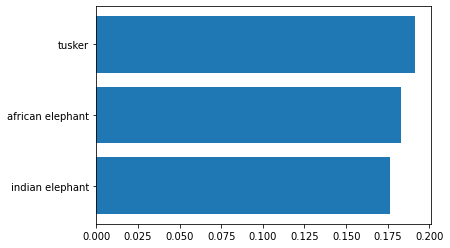

In [198]:
prediction = model(img_reshaped).squeeze(0).softmax(0)
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
print(f"The predicted class is {category_name} with score {100 * score:.2f}%")
k = 3
with torch.no_grad():
    predictions_np = prediction.numpy()
    topk = np.argpartition(predictions_np, -k)[-k:]
    topk_categories = [weights.meta["categories"][class_id].lower() for class_id in topk]
    topk_scores = [predictions_np[idx]*100 for idx in topk]
    plt.barh(topk_categories, topk_scores)
    plt.show()